# Naive Bayes for text classification

## Exercise 2

Here we are going to use the Naive Bayes Multinomial model library to fit a model

### Read data

We are retrieving a list of approx 5000 spam and non-spam emails (ham)

In [2]:
#! pip install requests
import requests 
import zipfile
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'
data_file = 'SMSSpamCollection'

# Make request
resp = requests.get(url)

# Get filename
filename = url.split('/')[-1]

# Download zipfile
with open(filename, 'wb') as f:
  f.write(resp.content)

# Extract Zip
with zipfile.ZipFile(filename, 'r') as zip:
  zip.extractall('')

# Read Dataset
data = pd.read_table(data_file, 
                     header = 0,
                     names = ['type', 'message']
                     )

# Show dataset
data

,type,message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...
5567,ham,Will ü b going to esplanade fr home?
5568,ham,"Pity, * was in mood for that. So...any other s..."
5569,ham,The guy did some bitching but I acted like i'd...


Install everything necessary: Natural Language Toolkit and the needed components

In [3]:
# NLTK: Natural Language Toolkit
#!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem.porter import *
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nataliaclark/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nataliaclark/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1st step: Tokenization.

It consists of separating the messages into words in order to be able to treat each. <BR>
We are doing it removing punctuation at the same time (thanks to the RegexpTokenizer function)

In [4]:
# Tokenize: create words from sentences, and removes punctuation
tokenizer = RegexpTokenizer(r'\w+') #w+ means one or more consecutive word characters
data['tokens'] = data.apply(lambda x: tokenizer.tokenize(x['message']), axis = 1)
data

,type,message,tokens
0,ham,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]"
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
2,ham,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, U, c, already, t..."
3,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, don, t, think, he, goes, to, usf, he,..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...,"[FreeMsg, Hey, there, darling, it, s, been, 3,..."
...,...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5567,ham,Will ü b going to esplanade fr home?,"[Will, ü, b, going, to, esplanade, fr, home]"
5568,ham,"Pity, * was in mood for that. So...any other s...","[Pity, was, in, mood, for, that, So, any, othe..."
5569,ham,The guy did some bitching but I acted like i'd...,"[The, guy, did, some, bitching, but, I, acted,..."


## 2nd step: Elimination of stop words

Elimination of words that normally do not add value (prepositions, conjunctions, etc.), only noise (there are exceptions, though) <BR> This is done to reduce size of our dataset (already large). 
<BR> There are many sources of stopwords in Python, for English language, Spacy has 326 words, Gensim 337, Scikit-learn 318, NLTK library, 179. 
<BR> More or less is not better in itself, you need to read them and assess whether you want to include or remove some (easy)

In [5]:
# Sklearn
from sklearn.feature_extraction import text
print(text.ENGLISH_STOP_WORDS)

frozenset({'mostly', 'could', 'with', 'hereafter', 'further', 'be', 'sincere', 'such', 'formerly', 'either', 'mine', 'sixty', 'why', 'whether', 'since', 'anywhere', 'mill', 'must', 'have', 'cry', 'nothing', 'beyond', 'empty', 'twelve', 'give', 'up', 'not', 'here', 'becomes', 'onto', 'third', 'had', 'also', 'beforehand', 'yourselves', 'cant', 'un', 'from', 'around', 'am', 'other', 'in', 'among', 'these', 'toward', 'elsewhere', 'thence', 'behind', 'each', 'being', 'per', 'always', 'next', 'several', 'eg', 'ever', 'it', 'someone', 'again', 'however', 'own', 'thru', 'back', 'because', 'latterly', 'seemed', 'into', 'hence', 'who', 'they', 'four', 'many', 'while', 'whose', 'to', 'front', 'therefore', 'she', 'throughout', 'become', 'will', 'an', 'due', 'anyhow', 'nobody', 'move', 'bill', 'made', 'towards', 'their', 'before', 'bottom', 'at', 'another', 'over', 'couldnt', 'full', 'almost', 'part', 'hers', 'across', 'whatever', 'fill', 'between', 'nevertheless', 'same', 'can', 'ours', 'those', '

In [6]:
# nltk
from nltk.corpus import stopwords
stop=stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

We will be using the stopwords in nltk library
- need to decide which list fits the requirements better
- sometimes disagree and build own list if needed

In [7]:
# Remove stop words
# using nltk - shorted list of stopwords, keeping if not in stopwords
data['tokens'] = data['tokens'].apply(lambda x: [item for item in x if item not in stop])
data

,type,message,tokens
0,ham,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]"
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
2,ham,U dun say so early hor... U c already then say...,"[U, dun, say, early, hor, U, c, already, say]"
3,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, think, goes, usf, lives, around, though]"
4,spam,FreeMsg Hey there darling it's been 3 week's n...,"[FreeMsg, Hey, darling, 3, week, word, back, I..."
...,...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...,"[This, 2nd, time, tried, 2, contact, u, U, 750..."
5567,ham,Will ü b going to esplanade fr home?,"[Will, ü, b, going, esplanade, fr, home]"
5568,ham,"Pity, * was in mood for that. So...any other s...","[Pity, mood, So, suggestions]"
5569,ham,The guy did some bitching but I acted like i'd...,"[The, guy, bitching, I, acted, like, intereste..."


## 3rd step: Apply stemming and lemmatization

**Stemming**: Stemming is a process of reducing inflected words to their word stem, base or root form. This is done by removing affixes, which are word parts that are added to the root to change its meaning or grammatical function. For example, the word "running" can be stemmed to "run" by removing the suffix "-ing".

**Lemmatization**: It is more used in NLP projects in English. It involves taking into account the morphology and grammar of the words, it would convert all the words to their base, in such a way that they come to mean the same thing. Example: For the words "am", "are", "is", stemming would not work, therefore they would all be lemmatised to "be". 

#####  Want to apply both because stemming can cut the word down to its stem, and lemmatization can infer some meaning.

First, stemming

In [8]:
# Apply Porter stemming
stemmer = PorterStemmer()
data['tokens'] = data['tokens'].apply(lambda x: [stemmer.stem(item) for item in x])

In [9]:
data.head(10)

,type,message,tokens
0,ham,Ok lar... Joking wif u oni...,"[ok, lar, joke, wif, u, oni]"
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,U dun say so early hor... U c already then say...,"[u, dun, say, earli, hor, u, c, alreadi, say]"
3,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, i, think, goe, usf, live, around, though]"
4,spam,FreeMsg Hey there darling it's been 3 week's n...,"[freemsg, hey, darl, 3, week, word, back, i, l..."
5,ham,Even my brother is not like to speak with me. ...,"[even, brother, like, speak, they, treat, like..."
6,ham,As per your request 'Melle Melle (Oru Minnamin...,"[as, per, request, mell, mell, oru, minnaminun..."
7,spam,WINNER!! As a valued network customer you have...,"[winner, as, valu, network, custom, select, re..."
8,spam,Had your mobile 11 months or more? U R entitle...,"[had, mobil, 11, month, u, r, entitl, updat, l..."
9,ham,I'm gonna be home soon and i don't want to tal...,"[i, gonna, home, soon, want, talk, stuff, anym..."


Now, we apply lemmatization. We download a pre-trained spacy model called en_core_web_sm, which is a NLP model for the English language. <BR>It includes information about lemmatisation, morphological analysis, grammatical tagging and other tasks related to NLP.

In [10]:
#!pip install spacy
#!python -m spacy download en_core_web_sm

import spacy
nlp = spacy.load('en_core_web_sm')

In [11]:
def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

# Aplicar la lematización a la columna 'tokens'
data['tokens'] = data['tokens'].apply(lemmatize_tokens)
data

,type,message,tokens
0,ham,Ok lar... Joking wif u oni...,"[ok, lar, joke, wif, u, oni]"
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,U dun say so early hor... U c already then say...,"[u, dun, say, earli, hor, u, c, alreadi, say]"
3,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, I, think, goe, usf, live, around, though]"
4,spam,FreeMsg Hey there darling it's been 3 week's n...,"[freemsg, hey, darl, 3, week, word, back, I, l..."
...,...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...,"[thi, 2nd, time, tri, 2, contact, u, u, 750, p..."
5567,ham,Will ü b going to esplanade fr home?,"[will, ü, b, go, esplanad, fr, home]"
5568,ham,"Pity, * was in mood for that. So...any other s...","[piti, mood, so, suggest]"
5569,ham,The guy did some bitching but I acted like i'd...,"[the, guy, bitch, I, act, like, interest, buy,..."


And we can optionally export cleaned data before applying the model

In [12]:
data.to_excel("cleaned.xlsx")

## Naive Bayes model

Naive Bayes model admits two types of source data:<BR>

**1. A Matrix** that shows, for each document, either how many times each of the words in all the documents has appeared or how important is the word in each document compared to the whole source of data. We will run an example first with a Matrix showing frequencies and the 2nd with the more complex one. <BR>
**2. An array of appearances**. It is similar to a TF matrix, but in this case, instead of indicating the number of occurrences, it simply indicates whether or not that word appeared.<BR>
<BR>If we have plenty of data, normally a Matrix is preferred

First, we are detokenizing the rows, that is, joining back the words, once they have been cleaned

In [13]:
# Unify the strings once again
data['tokens'] = data['tokens'].apply(lambda x: ' '.join(x))
data

,type,message,tokens
0,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
2,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
3,ham,"Nah I don't think he goes to usf, he lives aro...",nah I think goe usf live around though
4,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darl 3 week word back I like fun s...
...,...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...,thi 2nd time tri 2 contact u u 750 pound prize...
5567,ham,Will ü b going to esplanade fr home?,will ü b go esplanad fr home
5568,ham,"Pity, * was in mood for that. So...any other s...",piti mood so suggest
5569,ham,The guy did some bitching but I acted like i'd...,the guy bitch I act like interest buy someth e...


In [14]:
data.to_excel("data.xlsx")

Now we are splitting our data as always

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Make split
x_train, x_test, y_train, y_test = train_test_split(
    data['tokens'], 
    data['type'], 
    test_size= 0.2
    )

In [16]:
print("Training data set size: ", len(x_train))
print("Testing data set size: ", len(x_test))

Training data set size:  4456
Testing data set size:  1115


And here is where we create the matrix. The CountVectorizer convert a collection of text documents into a matrix of term or word counts. <BR>Each document is represented as a vector where each element of the vector corresponds to the frequency count of a specific word in the document.

In [17]:
# Create vectorizer
vectorizer = CountVectorizer(
    strip_accents = 'ascii', 
    lowercase = True
    )

# Fit vectorizer & transform it
vectorizer_fit = vectorizer.fit(x_train)
x_train_transformed = vectorizer_fit.transform(x_train)
x_test_transformed = vectorizer_fit.transform(x_test)

x_test_transformed
# sparse matrix because many empty cells if remembering the matrix
# most powerful way to fit a multinomial naive bayes model

<1115x6432 sparse matrix of type '<class 'numpy.int64'>'
	with 9786 stored elements in Compressed Sparse Row format>

### Multinomial NB fit

Now we build the Naive Bayes model and train it. 
<BR> There are two NB models in sklearn we can use: <BR>
- Gaussian. It is useful when we have metric features
- Multinomial. Appropriated for text classification where variables represent frequencies

We will be applying Multinomial model

In [18]:
# Build the model
from sklearn.naive_bayes import MultinomialNB

# Train the model
naive_bayes = MultinomialNB()
naive_bayes_fit = naive_bayes.fit(x_train_transformed, y_train)

And we make predictions

In [19]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score

# Make predictions
train_predict = naive_bayes_fit.predict(x_train_transformed)
test_predict = naive_bayes_fit.predict(x_test_transformed)

def get_scores(y_real, predict):
  ba_train = balanced_accuracy_score(y_real, predict)
  return ba_train

train_scores = get_scores(y_train, train_predict)
test_scores = get_scores(y_test, test_predict)

This is the result

In [20]:
print("## Train Accuracy")
print("Accuracy of Train set = {0:.2%}".format(train_scores))
print("\n## Test Accuracy")
print("Accuracy of Test set = {0:.2%}".format(test_scores))

## Train Accuracy
Accuracy of Train set = 98.23%

## Test Accuracy
Accuracy of Test set = 96.19%


And the confusion matrix

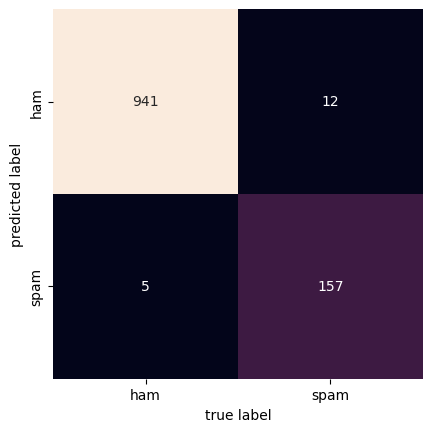

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test, test_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=naive_bayes_fit.classes_, yticklabels=naive_bayes_fit.classes_)
plt.xlabel('true label')
plt.ylabel('predicted label');